In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))

import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from astropy import constants
from astropy.units import Quantity,Unit

In [2]:
from src import utils,physics,nsphere,run_units,plot
from src.distribution.distribution import Distribution
from src.distribution.nfw import NFW
from src.distribution.hernquist import Hernquist
from src.distribution.uniform import Uniform
from src.spatial_approximation import Lattice
from src.halo import Halo
from src.background import Mass_Distribution
from src.tqdm import tqdm

# Constants and general functions

In [3]:
dm_rho_s = Quantity(2.73e7,'Msun/kpc^3')
# dm_rho_s = Quantity(2.8e7,'Msun/kpc^3')
Rs = Quantity(1.18,'kpc')
c = 19
b_Mtot = Quantity(1e5,'Msun')
sigma = Quantity(50,'cm^2/gram')
# sigma = Quantity(20,'cm^2/gram')
# sigma = Quantity(0,'cm^2/gram')

dm_distribution = NFW(Rs=Rs,c=c,rho_s=dm_rho_s,particle_type='dm')
b_distribution = Hernquist(Rs=Rs,c=c,Mtot=b_Mtot,particle_type='baryon')

dm_Mtot = dm_distribution.Mtot

# Run

In [4]:
dm_n_particles = 1e4
b_n_particles = 1e4
dt = dm_distribution.Tdyn / 1000
save_every_time = 10*dm_distribution.Tdyn
hard_save = True
save_path = 'run 4'

halo = Halo.setup(distributions=[dm_distribution,b_distribution],n_particles=[dm_n_particles,b_n_particles],dt=dt,hard_save=hard_save,
                  save_path=save_path,save_every_time=save_every_time,cleanup_nullish_particles=False,cleanup_particles_by_radius=True,
                  dynamics_params={'raise_warning':False,'grid_window_radius':0},scatter_params={'kappa':0.02,'sigma':sigma})

In [20]:
halo.dynamics_params['r_convergence_threshold']=1e-3
halo.dynamics_params['vr_convergence_threshold']=1e-3
halo.dynamics_params['max_minirounds']=10

In [ ]:
halo.evolve(until_t=Quantity(17,'Gyr'))

<Axes: xlabel='iteration', ylabel='total sidm.scatter run time every 5297 steps'>

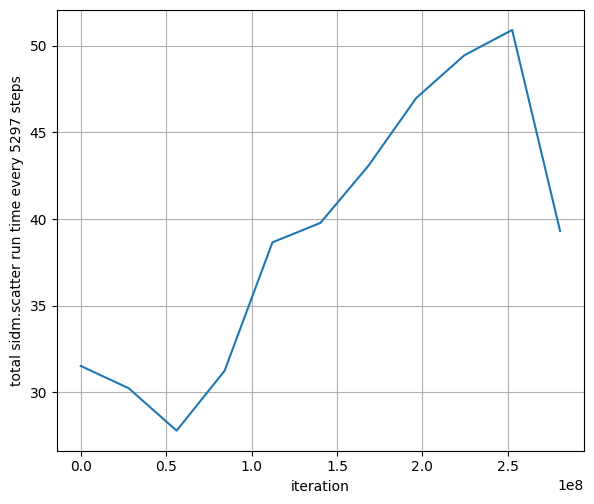

In [22]:
time_binning = Quantity(100, 'Myr')
n = int(time_binning / halo.dt)
y = np.array(halo.scatter_time)
x = (np.arange(len(y)) * n)[::n]
y = np.add.reduceat(y, np.arange(0, len(y), n))
fig, ax = plot.setup_plot(xlabel='iteration', ylabel=f'total sidm.scatter run time over {n} steps')
sns.lineplot(x=x, y=y)

<Axes: xlabel='iteration', ylabel='total leapfrog.step run time over 5297 steps'>

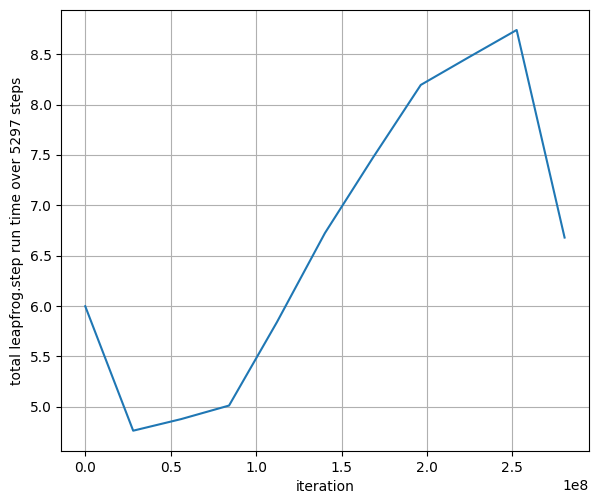

In [24]:
time_binning = Quantity(100, 'Myr')
n = int(time_binning / halo.dt)
y = np.array(halo.leapfrog_time)
x = (np.arange(len(y)) * n)[::n]
y = np.add.reduceat(y, np.arange(0, len(y), n))
fig, ax = plot.setup_plot(xlabel='iteration', ylabel=f'total leapfrog.step run time over {n} steps')
sns.lineplot(x=x, y=y)

<Axes: xlabel='iteration', ylabel='total sort run time over 5297 steps'>

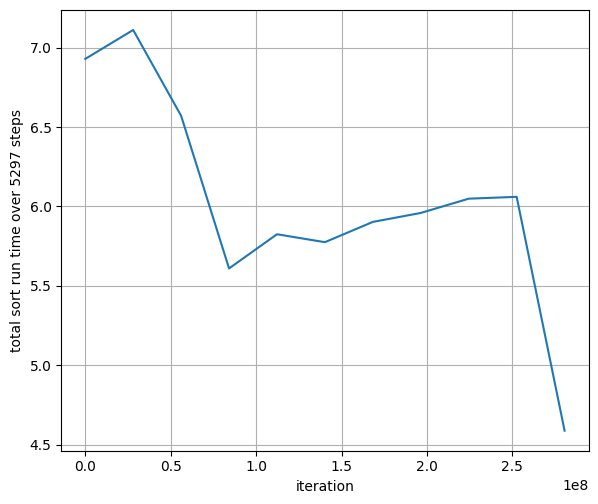

In [26]:
time_binning = Quantity(100, 'Myr')
n = int(time_binning / halo.dt)
y = np.array(halo.sort_time)
x = (np.arange(len(y)) * n)[::n]
y = np.add.reduceat(y, np.arange(0, len(y), n))
fig, ax = plot.setup_plot(xlabel='iteration', ylabel=f'total sort run time over {n} steps')
sns.lineplot(x=x, y=y)

<Axes: xlabel='iteration', ylabel='total cleanup run time over 5297 steps'>

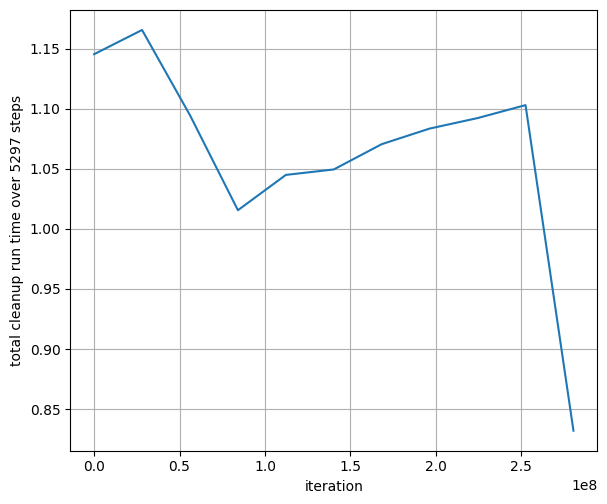

In [27]:
time_binning = Quantity(100, 'Myr')
n = int(time_binning / halo.dt)
y = np.array(halo.cleanup_time)
x = (np.arange(len(y)) * n)[::n]
y = np.add.reduceat(y, np.arange(0, len(y), n))
fig, ax = plot.setup_plot(xlabel='iteration', ylabel=f'total cleanup run time over {n} steps')
sns.lineplot(x=x, y=y)

<Axes: >

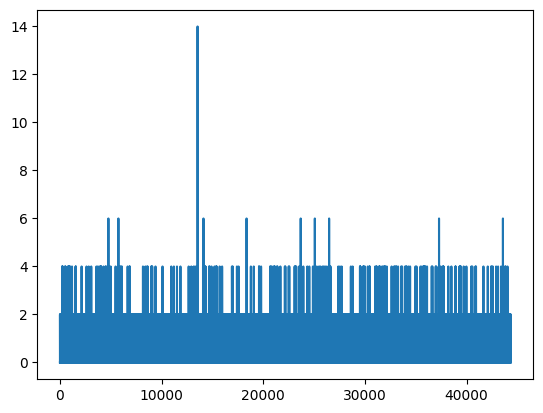

In [17]:
sns.lineplot(halo.n_scatters)

In [69]:
mask = self._particles['particle_type'] == 'dm'
r=self._particles.loc[mask, 'r']
vx=self._particles.loc[mask, 'vx']
vy=self._particles.loc[mask, 'vy']
vr=self._particles.loc[mask, 'vr']
dt=self.dt
m=self._particles.loc[mask, 'm']
max_radius_j=10
max_allowed_rounds=100
kappa=0.02
sigma=self.scatter_params['sigma']

In [17]:
from typing import cast
from numpy.typing import NDArray

In [85]:
from numba import njit,prange

In [ ]:
%%timeit


In [7]:
halo.n_scatters.sum()/halo.n_particles['dm']

np.float64(5.84874)

In [12]:
halo.save()

In [13]:
halo.cleanup_nullish_particles = False
halo.cleanup_particles_by_radius = False

In [4]:
halo = Halo.load('run 4')
# halo = Halo.load('dual run')

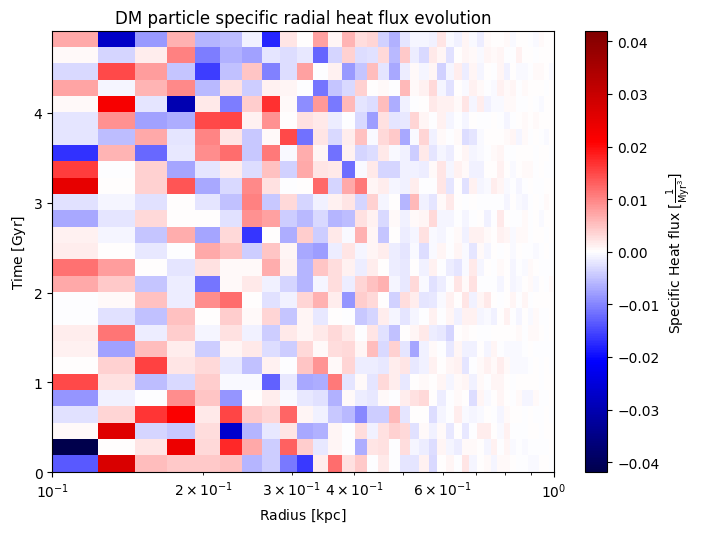

In [35]:
from matplotlib import colors
# halo.time.to('Gyr').value
fig,ax = halo.plot_heat_flux_evolution(filter_particle_type='dm',time_units='Gyr',time_range=Quantity([0,5],'Gyr'),
                                       title='DM particle specific radial heat flux evolution',
                                       radius_bins=Quantity(np.geomspace(1e-1, 1, 40), 'kpc'),
                                       # radius_bins=Quantity(np.linspace(1e-1, 1, 100), 'kpc'),
                                       # x_tick_format='%.1f',
                                       norm = colors.CenteredNorm(0),
                                       setup_kwargs={'figsize':(7,5)},
                                       x_log=True,
                                       # x_log=False,
                             )

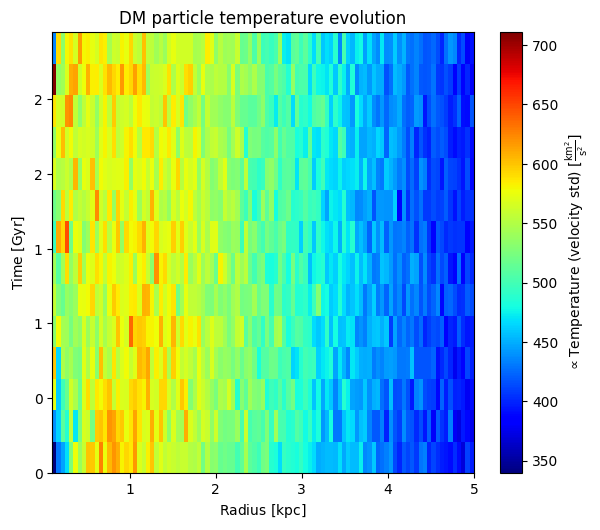

In [8]:
fig,ax = halo.plot_temperature_evolution(filter_particle_type='dm',title='DM particle temperature evolution',time_units='Gyr',
                                         time_range=Quantity([0,6],'Gyr'))

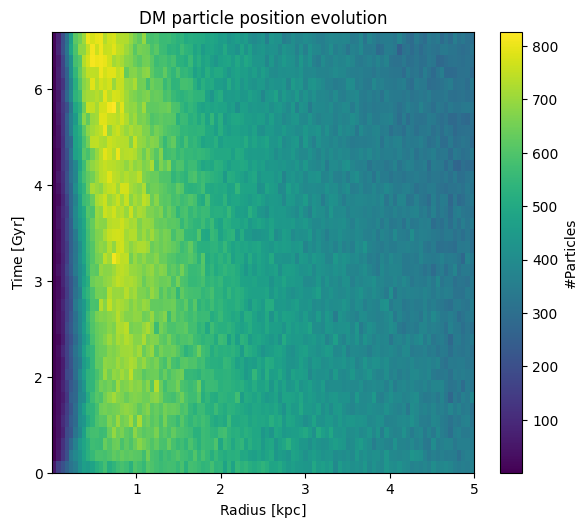

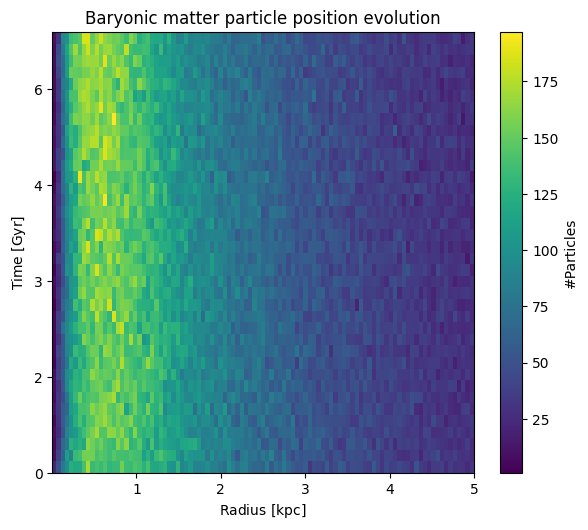

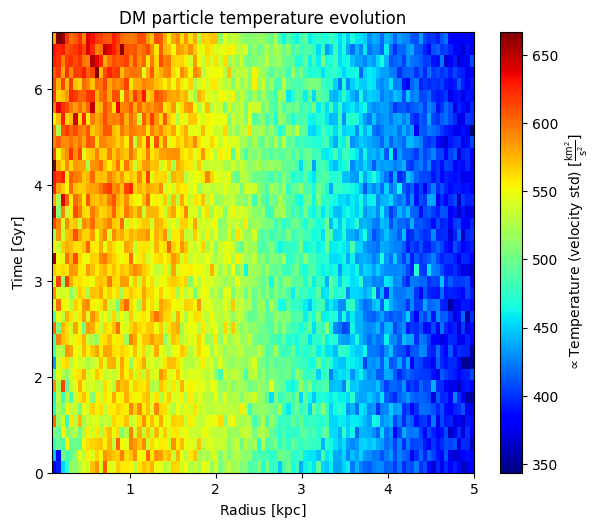

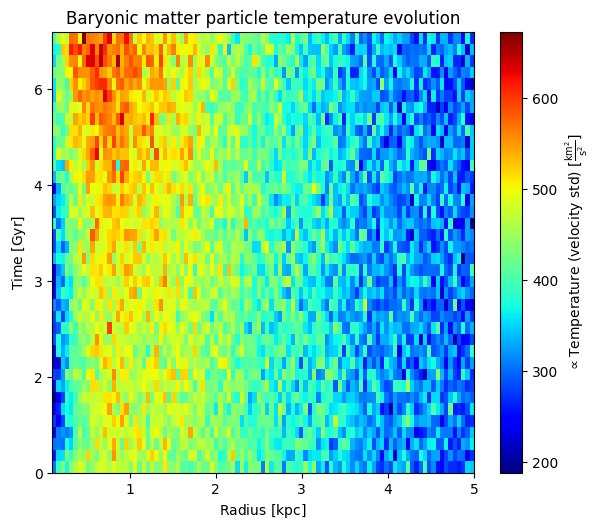

In [60]:
kwargs = {'time_units':'Gyr','time_range':Quantity([0,halo.time.to('Gyr').value],'Gyr'),}
          # 'hlines':[{'y':halo.core_collapse_time.to('Gyr').value, 'color':'red', 'linestyle':'--', 'linewidth':0.5}]}

fig,ax = halo.plot_particle_evolution(filter_particle_type='dm',title='DM particle position evolution',**kwargs)
# fig.savefig('../../DM particle position evolution.png',bbox_inches='tight')

fig,ax = halo.plot_particle_evolution(filter_particle_type='baryon',title='Baryonic matter particle position evolution',**kwargs)
# # fig.savefig('../../Baryonic matter particle position evolution.png',bbox_inches='tight')

fig,ax = halo.plot_temperature_evolution(filter_particle_type='dm',title='DM particle temperature evolution',**kwargs)
# # fig.savefig('../../DM particle temperature evolution.png',bbox_inches='tight')

fig,ax = halo.plot_temperature_evolution(filter_particle_type='baryon',title='Baryonic matter particle temperature evolution',**kwargs)
# # fig.savefig('../../Baryonic matter particle temperature evolution.png',bbox_inches='tight')

Text(0.5, 1.0, 'Predicted collapse time')

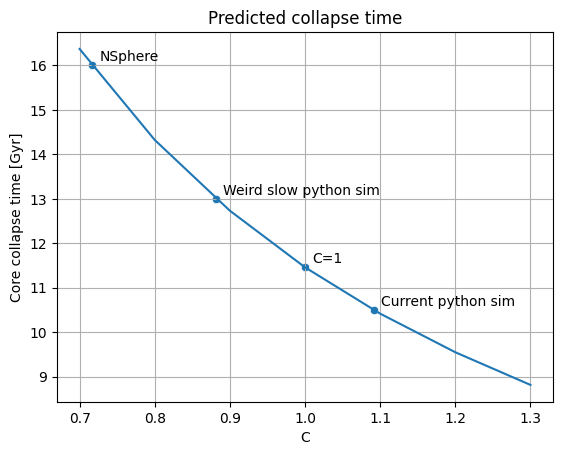

In [12]:
C = np.arange(0.7,1.3,0.1)
ax = sns.lineplot(x=C,y=(340/(8*C*dm_density.Rs*dm_density.rho_s**(3/2)*np.sqrt(constants.G)*sigma)).to('Gyr'))
plt.grid(True)

select_t = np.sort(np.hstack([Quantity([10.5,13,16],'Gyr'),(340/(8*dm_density.Rs*dm_density.rho_s**(3/2)*np.sqrt(constants.G)*sigma)).to('Gyr')]))
select_C = (340/(select_t*8*dm_density.Rs*dm_density.rho_s**(3/2)*np.sqrt(constants.G)*sigma)).to('')
sns.scatterplot(x=select_C,y=select_t,ax=ax)
ax.text(select_C[0].value+0.01,select_t[0].value+0.1,'Current python sim');
ax.text(select_C[1].value+0.01,select_t[1].value+0.1,'C=1');
ax.text(select_C[2].value+0.01,select_t[2].value+0.1,'Weird slow python sim');
ax.text(select_C[3].value+0.01,select_t[3].value+0.1,'NSphere');

ax.set_xlabel('C')
ax.set_ylabel('Core collapse time [Gyr]')
ax.set_title('Predicted collapse time')

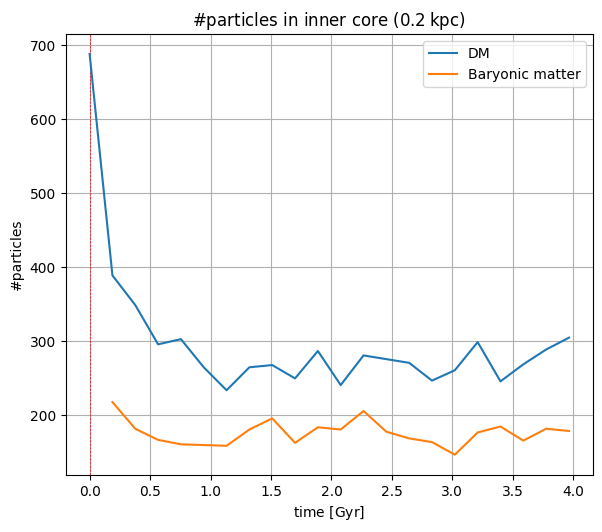

In [15]:
fig,ax = halo.plot_inner_core_density(filter_particle_type='dm',include_now=False,time_units='Gyr',label='DM',
                                      vlines=[{'x':halo.core_collapse_time.to('Gyr').value, 'color':'red', 'linestyle':'--', 'linewidth':0.5}]);
halo.plot_inner_core_density(filter_particle_type='baryon',include_now=False,include_start=False,time_units='Gyr',label='Baryonic matter',
                             ax=ax,fig=fig);

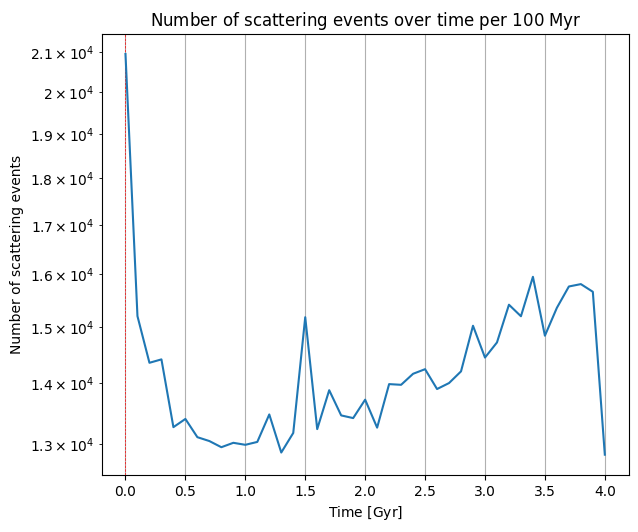

In [14]:
fig,ax = halo.plot_binned_scattering_amount_over_time(ax_set={'yscale':'log'},vlines=[{'x':halo.core_collapse_time.to('Gyr').value,
                                                                                       'color':'red', 'linestyle':'--', 'linewidth':0.5}])

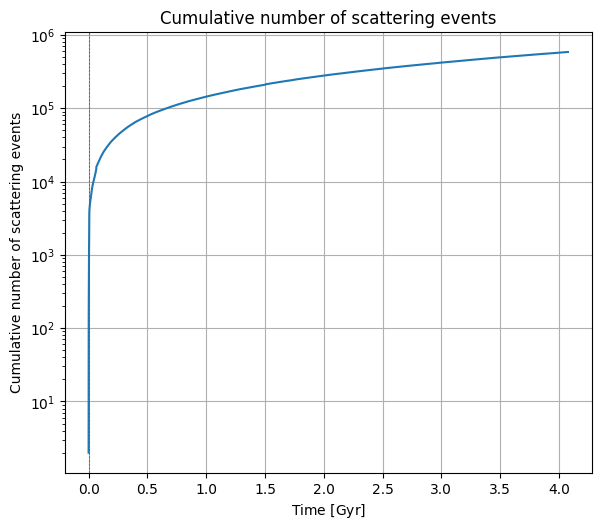

In [13]:
fig,ax = halo.plot_cumulative_scattering_amount_over_time(vlines=[{'x':halo.core_collapse_time.to('Gyr').value,
                                                                   'color':'red', 'linestyle':'--', 'linewidth':0.5}])

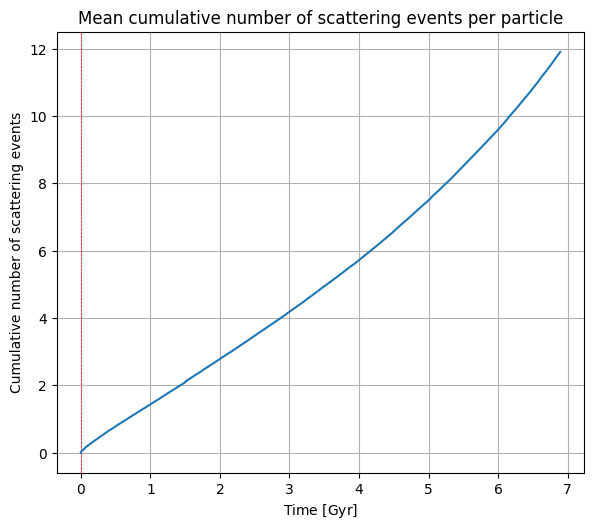

In [61]:
fig,ax = halo.plot_cumulative_scattering_amount_per_particle_over_time(vlines=[{'x':halo.core_collapse_time.to('Gyr').value,
                                                                                'color':'red', 'linestyle':'--', 'linewidth':0.5}])

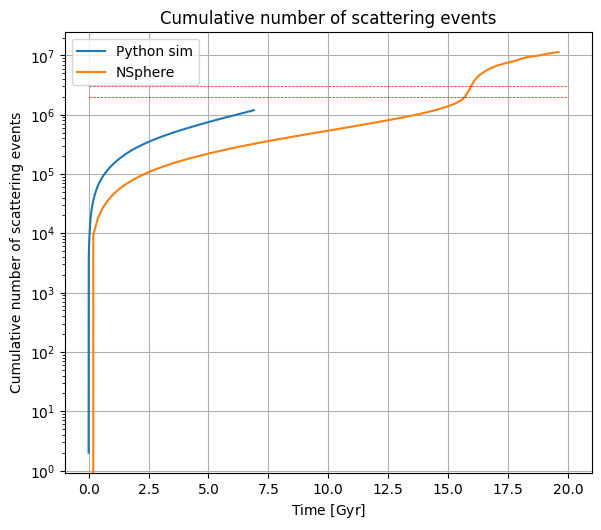

In [62]:
nsphere_data = nsphere.read_log('../../run_output.txt',append_zero=True)
fig,ax = halo.plot_cumulative_scattering_amount_over_time(ax_set={'yscale':'log'},title='Cumulative number of scattering events',label='Python sim')
plot.plot_cumulative_scattering_amount_over_time(nsphere_data['cumulative_scatters'],nsphere_data['time'],label='NSphere',ax=ax,fig=fig);
ax.hlines(y=[2e6,3e6],xmin=0,xmax=20,linestyles='--',colors='red',linewidth=0.5)

In [23]:
scatters = np.array([len(x) for x in halo.scatter_track])
x = (np.arange(len(scatters)) * halo.dt).to('Gyr')

In [24]:
cutoff = 40

collapse_time = np.abs(scatters.cumsum()/halo.n_particles['dm']-cutoff).argmin()*halo.dt
collapse_time_nsphere = Quantity(nsphere_data.iloc[(nsphere_data['cumulative_scatters']/halo.n_particles['dm']-cutoff).abs().argmin()]['time'],'Myr')

In [25]:
time_factor = collapse_time_nsphere/collapse_time

<Axes: title={'center': 'Cumulative number of scattering events'}, xlabel='Time [$\\mathrm{Gyr}$]', ylabel='Cumulative number of scattering events'>

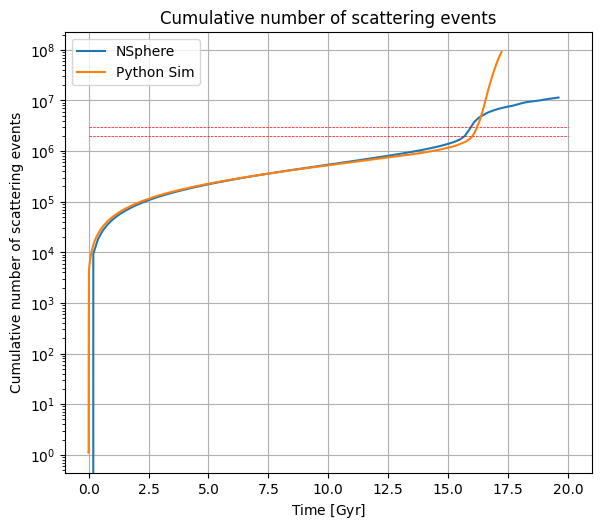

In [26]:
fig,ax = plot.plot_cumulative_scattering_amount_over_time(nsphere_data['cumulative_scatters'],nsphere_data['time'],label='NSphere',
                                                          ax_set={'yscale':'log'},title='Cumulative number of scattering events');
ax.hlines(y=[2e6,3e6],xmin=0,xmax=20,linestyles='--',colors='red',linewidth=0.5)
sns.lineplot(x=x*time_factor, y=scatters.cumsum()*0.55, ax=ax, label='Python Sim')

In [10]:
from matplotlib import colors
for particle_type,max_count in zip(['dm','baryon'],[65,15]):
    halo.plot_phase_space_evolution(save_path=f'../../Phase space evolution {particle_type}.gif',filter_particle_type=particle_type,
                                    frame_plot_kwargs={'norm':colors.Normalize(0,max_count)});

  0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

In [20]:
r_array = Quantity(np.linspace(1e-2, 50, 200), 'kpc')
# Es = Quantity([Quantity(0,run_units.specific_energy),dm_density.Psi_grid[-90],dm_density.Psi_grid[-120]])
Es = Quantity([0,170,240],'km^2/second^2')
v_arrays = 2*(dm_distribution.Psi_interpolate(r_array)-np.expand_dims(Es,1))
v_arrays[v_arrays < 0] = np.nan
v_arrays = np.sqrt(v_arrays).to('km/second')

Text(18, 5, 'E=240 km2 / s2')

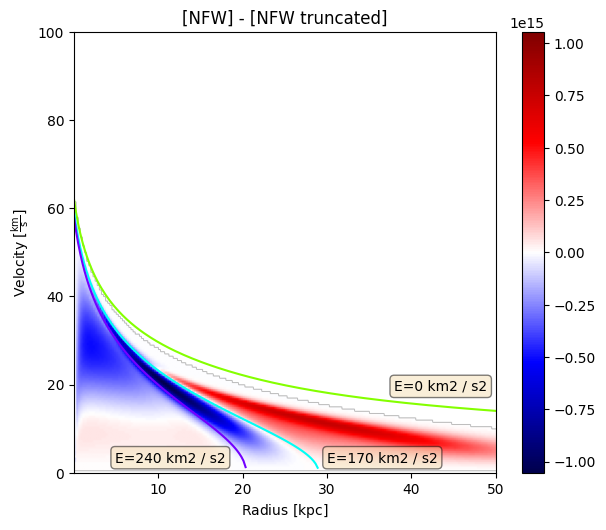

In [156]:
from matplotlib import colors
fig,ax = plot.plot_phase_space(
    grid_untruncated-grid_truncated,
    Quantity(np.linspace(1e-2, 50, 200), 'kpc'),
    Quantity(np.linspace(0, 100, 200), 'km/second'),
    velocity_units='km/second', cmap='seismic', transparent_value=0,
    norm=colors.CenteredNorm(0),
    title='[NFW] - [NFW truncated]'
)

color_palette = sns.color_palette('hsv', len(v_arrays))

for i,v_array in enumerate(v_arrays):
    sns.lineplot(x=r_array,y=v_array,ax=ax,color=color_palette[i])

ax.text(s=f'E={Es[0].to('km^2/second^2'):.0f}',**utils.drop_None(**plot.pretty_ax_text(x=49,y=18,verticalalignment='bottom',
                                                                                       horizontalalignment='right')))
ax.text(s=f'E={Es[1].to('km^2/second^2'):.0f}',**utils.drop_None(**plot.pretty_ax_text(x=30,y=5)))
ax.text(s=f'E={Es[2].to('km^2/second^2'):.0f}',**utils.drop_None(**plot.pretty_ax_text(x=18,y=5,horizontalalignment='right')))

In [13]:
r, v = np.meshgrid(Quantity(np.linspace(1e-2, 50, 200), 'kpc'),Quantity(np.linspace(0, 100, 200), 'km/second'))
grid_truncated = 16 * np.pi * r**2 * v**2 * dm_distribution.f(dm_distribution.E(r, v))

In [7]:
from matplotlib import colors
from matplotlib.backends.backend_agg import FigureCanvasAgg
from PIL import Image

Rvirs = sorted(Quantity([10,c*Rs.to('kpc').value,40,50,75,100,10000],'kpc'))
r, v = np.meshgrid(Quantity(np.linspace(1e-2, 50, 200), 'kpc'),Quantity(np.linspace(0, 100, 200), 'km/second'))
distributions = [NFW(Rs=Rs,Rvir=Rvir,rho_s=dm_rho_s,particle_type='dm') for Rvir in Rvirs]
plot.save_images(images=plot.to_images(iterator=sorted(distributions,key=lambda x:x.Rvir),plot_fn=lambda distribution:plot.plot_phase_space(
    16 * np.pi * r**2 * v**2 * distribution.f(distribution.E(r, v)),
    Quantity(np.linspace(1e-2, 50, 200), 'kpc'),
    Quantity(np.linspace(0, 60, 200), 'km/second'),
    velocity_units='km/second', cmap='jet', transparent_value=0,
    title=rf'Truncation with $R_\mathrm{{vir}}={distribution.Rvir.value:.1f}\ [\mathrm{{{distribution.Rvir.unit}}}]$'
)),
                 save_path='../../NFW exponent-2 truncation effect unfixed rho_s.gif', duration = 1000)

  0%|          | 0/7 [00:00<?, ?it/s]

ERROR! Session/line number was not unique in database. History logging moved to new session 2613


In [38]:
distribution

NFW density function
  - particle_type = dm
  - Rs = 1.1800 kpc
  - c = 19.0
  - Rvir = 22.4200 kpc
  - Mtot = 1.150e+09 solMass
  - rho_s = 27207262.7849 solMass / kpc3
  - Tdyn = 17.8213 Myr

  - Rmin = 0.0001 kpc
  - Rmax = 100.3000 kpc
  - space_steps = 1e+03

<Axes: xlabel='$\\frac{1}{R_\\mathrm{vir}}\\ \\left[\\mathrm{1 / kpc}\\right]$', ylabel='Energy boundaries for second peak $\\left[\\frac{\\mathrm{km}^2}{\\mathrm{second}^2}\\right]$'>

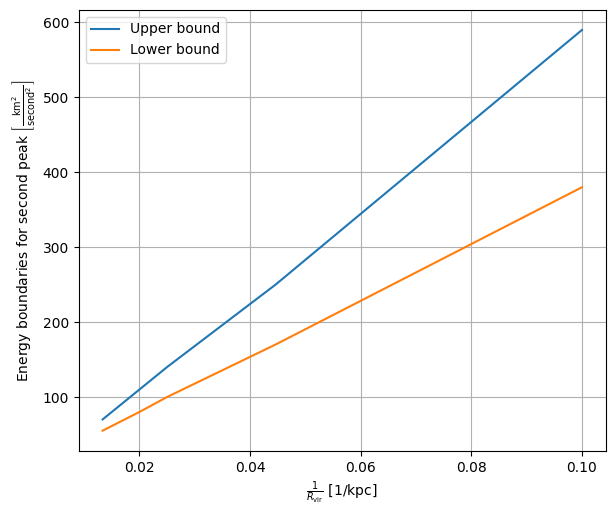

In [132]:
Rvir_array = 1/Quantity([10,22.42,40,50,75],'kpc')
Bounds_array = Quantity([[380,590],[170,250],[100,140],[80,110],[55,70]],'km^2/second^2')

fig,ax = plot.setup_plot(xlabel=rf'$\frac{{1}}{{R_\mathrm{{vir}}}}\ \left[\mathrm{{{Rvir_array.unit}}}\right]$',
                         ylabel=rf'Energy boundaries for second peak $\left[\frac{{\mathrm{{km}}^2}}{{\mathrm{{second}}^2}}\right]$')

sns.lineplot(x=Rvir_array,y=Bounds_array[:,1],label='Upper bound',ax=ax)
sns.lineplot(x=Rvir_array,y=Bounds_array[:,0],label='Lower bound',ax=ax)

In [117]:
distribution.Rvir.value

np.float64(10.0)

In [119]:
170 / (10/22.42)

381.14000000000004

In [7]:
distribution = distributions[1]
radius_bins = Quantity(np.linspace(1e-2, 50, 200), 'kpc')
velocity_bins = Quantity(np.linspace(0, 60, 200), 'km/second')
r, v = np.meshgrid(radius_bins,velocity_bins)
fig,ax = plot.plot_phase_space(
    16 * np.pi * r**2 * v**2 * distribution.f(distribution.E(r, v)),
    radius_bins, velocity_bins, velocity_units='km/second', cmap='terrain_r', transparent_value=0,
    title=rf'Truncation with $R_\mathrm{{vir}}={distribution.Rvir.value:.1f}\ [\mathrm{{{distribution.Rvir.unit}}}]$, $M_\mathrm{{tot}}={distribution.Mtot.value:.1e}\ [M_\odot]$'
)

# r_array = Quantity(np.linspace(1e-2, 50, 300), 'kpc')
# Es = Quantity([380,590],'km^2/second^2')
# v_arrays = 2*(distribution.Psi_interpolate(r_array)-np.expand_dims(Es,1))
# v_arrays[v_arrays < 0] = np.nan
# v_arrays = np.sqrt(v_arrays).to('km/second')


# color_palette = sns.color_palette('hot', len(v_arrays))
# sns.lineplot(x=r_array,y=v_arrays[0],ax=ax,color=color_palette[0])
# sns.lineplot(x=r_array,y=v_arrays[1],ax=ax,color=color_palette[1])
# ax.text(s=f'E={Es[0].to('km^2/second^2'):.0f}',**utils.drop_None(**plot.pretty_ax_text(x=30,y=5)))
# ax.text(s=f'E={Es[1].to('km^2/second^2'):.0f}',**utils.drop_None(**plot.pretty_ax_text(x=18,y=5,horizontalalignment='right')))

NameError: name 'distributions' is not defined

In [8]:
from matplotlib import colors
from matplotlib.backends.backend_agg import FigureCanvasAgg
from PIL import Image

distributions = [NFW(Rs=Rs,Rvir=Rvir,rho_s=dm_density.rho_s,Mtot=dm_Mtot,particle_type='dm') for Rvir in Rvirs]
plot.save_images(images=plot.to_images(iterator=[dm_density]+distributions,plot_fn=lambda distribution:plot.plot_phase_space(
    16 * np.pi * r**2 * v**2 * distribution.f(distribution.E(r, v)),
    Quantity(np.linspace(1e-2, 50, 200), 'kpc'),
    Quantity(np.linspace(0, 100, 200), 'km/second'),
    velocity_units='km/second', cmap='jet', transparent_value=0,
    title=rf'Truncation with $R_\mathrm{{vir}}={distribution.Rvir.value:.1f}\ [\mathrm{{{distribution.Rvir.unit}}}]$'
)),
                 save_path='../../NFW truncation effect fixed rho_s.gif', duration = 1000)

  0%|          | 0/6 [00:00<?, ?it/s]

In [10]:
from matplotlib import colors
from matplotlib.backends.backend_agg import FigureCanvasAgg
from PIL import Image

distributions = [Hernquist(Rs=Rs,Rvir=Rvir,Mtot=dm_Mtot,particle_type='dm') for Rvir in Rvirs]
plot.save_images(images=plot.to_images(iterator=distributions,plot_fn=lambda distribution:plot.plot_phase_space(
    16 * np.pi * r**2 * v**2 * distribution.f(distribution.E(r, v)),
    Quantity(np.linspace(1e-2, 50, 200), 'kpc'),
    Quantity(np.linspace(0, 100, 200), 'km/second'),
    velocity_units='km/second', cmap='jet', transparent_value=0,
    title=rf'Truncation with $R_\mathrm{{vir}}={distribution.Rvir.value:.1f}\ [\mathrm{{{distribution.Rvir.unit}}}]$'
)),
                 save_path='../../Hernquist truncation effect unfixed rho_s.gif', duration = 1000)

  0%|          | 0/6 [00:00<?, ?it/s]

Text(18, 5, 'E=240 km2 / s2')

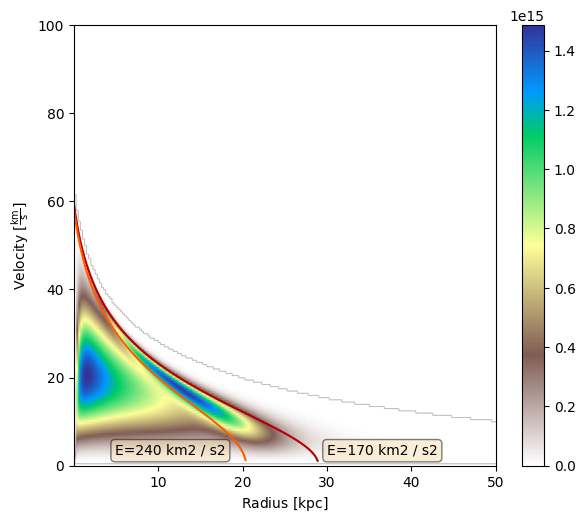

In [153]:
fig,ax = dm_density.plot_phase_space(cmap='terrain_r')
color_palette = sns.color_palette('hot', len(v_arrays))

for i,v_array in enumerate(v_arrays[1:]):
    sns.lineplot(x=r_array,y=v_array,ax=ax,color=color_palette[i])
ax.text(s=f'E={Es[1].to('km^2/second^2'):.0f}',**utils.drop_None(**plot.pretty_ax_text(x=30,y=5)))
ax.text(s=f'E={Es[2].to('km^2/second^2'):.0f}',**utils.drop_None(**plot.pretty_ax_text(x=18,y=5,horizontalalignment='right')))

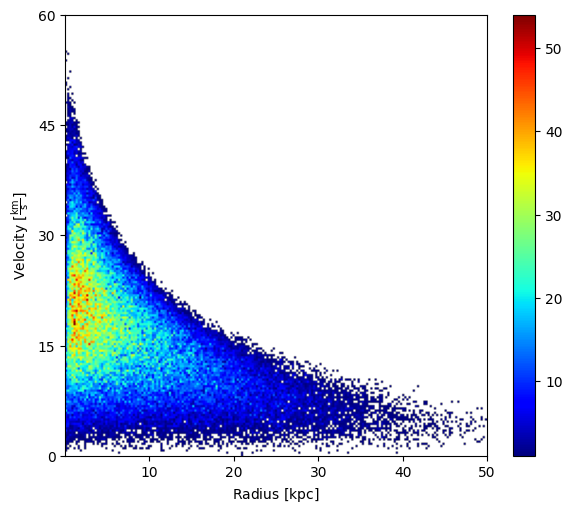

In [14]:
halo.plot_phase_space(halo.initial_particles,filter_particle_type='dm');

In [ ]:
halo.plot_densities_over_time();

### Compare underestimate scattering rates

In [ ]:
halo = Halo.load('run 3')

In [5]:
data = halo.get_particle_states().to_pandas()

In [6]:
nsphere_all_data,nsphere_initial_data,nsphere_unit_mass = nsphere.prepare_for_plotting(nsphere.load_all_files(
    base_filename='Rank_Mass_Rad_VRad_unsorted',ntimesteps=12525000,tfinal=1100,
    max_time=Quantity(19.605,'Gyr'),root_path='../../NSphere-SIDM/data/SIDM run'))

Load files: 100%|███████████████████████████████████████████████████████| 501/501 [00:02<00:00, 204.78it/s]


In [110]:
agg_data = data.groupby('time').apply(
    lambda group:physics.sidm.scatter_underestimate_shortcut(
        group['r'],group['vx'],group['vy'],group['vr'],halo.dt,group['m'],sigma=halo.scatter_params['sigma'],
        max_radius_j=halo.scatter_params['max_radius_j'],kappa=halo.scatter_params['kappa'],
        max_allowed_rounds=halo.scatter_params['max_allowed_rounds']),
    include_groups=False)

agg_data2 = data.groupby('time').apply(
    lambda group:physics.sidm.scatter_underestimate_shortcut(
        group['r'],group['vx'],group['vy'],group['vr'],halo.dt,group['m'],sigma=halo.scatter_params['sigma'],
        max_radius_j=halo.scatter_params['max_radius_j'],kappa=halo.scatter_params['kappa'],
        max_allowed_rounds=halo.scatter_params['max_allowed_rounds']*5),
    include_groups=False)

agg_data3 = data.groupby('time').apply(
    lambda group:physics.sidm.scatter_underestimate_shortcut(
        group['r'],group['vx'],group['vy'],group['vr'],halo.dt,group['m'],sigma=halo.scatter_params['sigma'],
        max_radius_j=halo.scatter_params['max_radius_j'],kappa=halo.scatter_params['kappa'],
        max_allowed_rounds=halo.scatter_params['max_allowed_rounds']*10),
    include_groups=False)

agg_data4 = data.groupby('time').apply(
    lambda group:physics.sidm.scatter_underestimate_shortcut(
        group['r'],group['vx'],group['vy'],group['vr'],halo.dt,group['m'],sigma=halo.scatter_params['sigma'],
        max_radius_j=halo.scatter_params['max_radius_j'],kappa=halo.scatter_params['kappa']/10,
        max_allowed_rounds=halo.scatter_params['max_allowed_rounds']*10),
    include_groups=False)

In [96]:
n = []
t = []
for time,group in tqdm(nsphere_all_data.groupby('time')):
    group = group.sort_values('r')
    t += [time]
    n += [physics.sidm.scatter_underestimate_shortcut(
        group['r'],*utils.split_2d(group['vp'],acos=False),group['vr'],Quantity(0.00178,'Myr'),np.full(len(group),dm_Mtot/len(group)),
        sigma=Quantity(50,'cm^2/gram').to(run_units.cross_section),max_radius_j=10,kappa=halo.scatter_params['kappa'],max_allowed_rounds=1)]
agg_data_nsphere = pd.Series(n,index=t)

  0%|          | 0/501 [00:00<?, ?it/s]

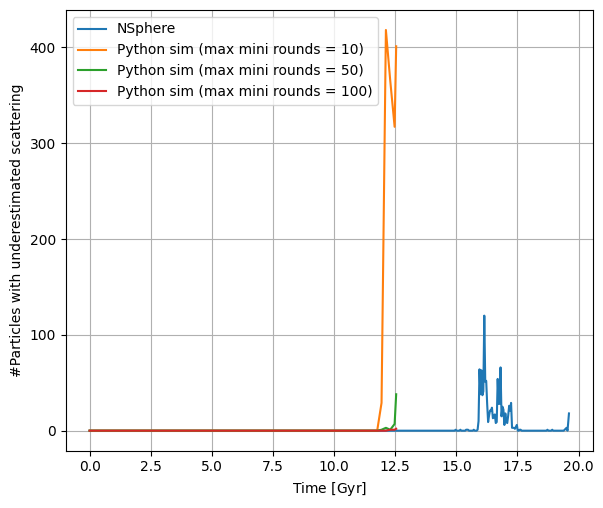

In [112]:
fig,ax = plot.setup_plot(xlabel=utils.add_label_unit('Time','Gyr'),ylabel='#Particles with underestimated scattering')
sns.lineplot(x=Quantity(agg_data_nsphere.index,'Gyr').to('Gyr'),y=np.array(agg_data_nsphere),ax=ax,label='NSphere')
sns.lineplot(x=Quantity(agg_data.index,'Myr').to('Gyr'),y=np.array(agg_data),ax=ax,label='Python sim (max mini rounds = 10)')
sns.lineplot(x=Quantity(agg_data2.index,'Myr').to('Gyr'),y=np.array(agg_data2),ax=ax,label='Python sim (max mini rounds = 50)')
sns.lineplot(x=Quantity(agg_data3.index,'Myr').to('Gyr'),y=np.array(agg_data3),ax=ax,label='Python sim (max mini rounds = 100)')
ax.legend()

# Background run

In [7]:
b_n_particles = 1e4
dt = dm_distribution.Tdyn / 1000
save_every_time = Quantity(100,'Myr')
hard_save = True
save_path = 'background run 1'

Distribution.merge_distribution_grids([dm_distribution,b_distribution])
halo = Halo.setup(distributions=[b_distribution],n_particles=[b_n_particles],dt=dt,Tdyn=dm_distribution.Tdyn,save_every_time=save_every_time,
                  hard_save=hard_save,save_path=save_path,
                  background=Mass_Distribution.from_files(Mtot=dm_Mtot,base_filename='Rank_Mass_Rad_VRad_unsorted',ntimesteps=12525000,tfinal=1100,
                                                          max_time=Quantity(19.605,'Gyr'),root_path='../../NSphere-SIDM/data/SIDM run'))

Load files: 100%|███████████████████████████████████████████████████████| 501/501 [00:00<00:00, 970.87it/s]


In [ ]:
halo.evolve(until_t=Quantity(17,'Gyr'),t_after_core_collapse=Quantity(-1,'Myr'))

In [10]:
halo.save()

ERROR! Session/line number was not unique in database. History logging moved to new session 2639


In [106]:
nsphere_all_data,nsphere_initial_data,nsphere_unit_mass = nsphere.prepare_for_plotting(nsphere.load_all_files(**halo.background.load_kwargs))

Load files: 100%|███████████████████████████████████████████████████████| 501/501 [00:02<00:00, 218.49it/s]


In [37]:
np.abs(nsphere_all_data['time'].unique()-1.5).argmin()
# nsphere_all_data['time'].unique()[434]

np.int64(38)

In [156]:
halo = Halo.load('run with background')
# halo = Halo.load('run without any background')

In [162]:
from matplotlib.colors import LogNorm

In [179]:
time_range = Quantity([2,17],'Gyr')
# bins = Quantity(np.geomspace(1e-3,1e3,100),'kpc')
r_bins = Quantity(np.linspace(1e-3,5,100),'kpc')
density_units = run_units.density

sub = halo.snapshots[(halo.snapshots['time'] >= time_range[0])*(halo.snapshots['time'] <= time_range[1])]
r_bin_volume = 4 / 3 * np.pi * (r_bins[1:] ** 3 - r_bins[:-1] ** 3)
grid = np.empty((len(np.unique(sub['time'])),len(r_bins)-1),dtype=np.float64)
for i,group in enumerate(sub.group_by('time').groups):
    counts,_ = np.histogram(group['r'], bins=r_bins)
    density = (counts / r_bin_volume * halo.m[0]).to(density_units)
    # grid[i] = density
    grid[i] = counts
extent = (r_bins.min(),r_bins.max(),sub['time'].min(),sub['time'].max())

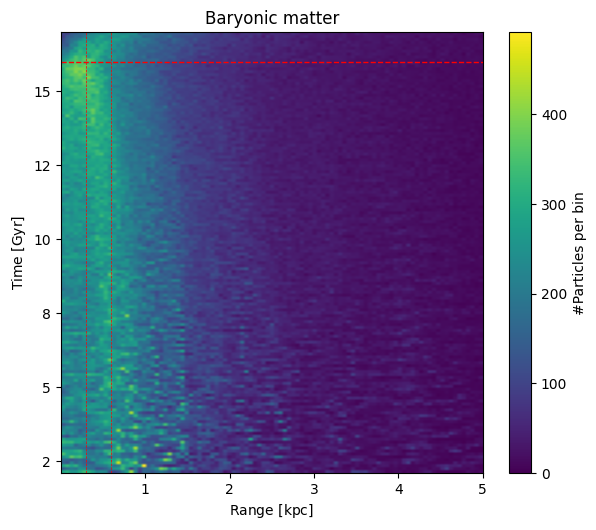

In [180]:
length_units = 'kpc'
time_units='Gyr'
xlabel = 'Range'
ylabel = 'Time'
cbar_label = '#Particles per bin'
kwargs = {}
fig,ax = plot.plot_2d(
    grid=grid,
    extent=extent,
    x_units=length_units,
    y_units=time_units,
    xlabel=utils.add_label_unit(xlabel, length_units),
    ylabel=utils.add_label_unit(ylabel, time_units),
    cbar_label=cbar_label,
    # title='Baryonic matter no DM background',
    title='Baryonic matter',
    **kwargs,
)
ax.axhline(y=16, color='red', linestyle='--', linewidth=1)
ax.axvline(x=0.3, color='red', linestyle='--', linewidth=0.5)
ax.axvline(x=0.6, color='red', linestyle='--', linewidth=0.5)

In [150]:
from astropy import table
time_range = Quantity([2,17],'Gyr')
# bins = Quantity(np.geomspace(1e-3,1e3,100),'kpc')
r_bins = Quantity(np.linspace(1e-3,5,100),'kpc')
density_units = run_units.density

nsphere_length_units = 'kpc'
nsphere_time_units = 'Gyr'

sub = nsphere_all_data[nsphere_all_data['time'].between(*time_range.to(nsphere_time_units).value)]
r_bin_volume = 4 / 3 * np.pi * (r_bins[1:] ** 3 - r_bins[:-1] ** 3)
grid = np.empty((len(np.unique(sub['time'])),len(r_bins)-1),dtype=np.float64)
for i,(time,group) in enumerate(sub.groupby('time')):
    counts,_ = np.histogram(Quantity(group['r'],nsphere_length_units), bins=r_bins.to(nsphere_length_units))
    density = (counts / r_bin_volume * halo.m[0]).to(density_units)
    grid[i] = counts
extent = (r_bins.min(),r_bins.max(),Quantity(sub['time'].min(),nsphere_time_units),Quantity(sub['time'].max(),nsphere_time_units))

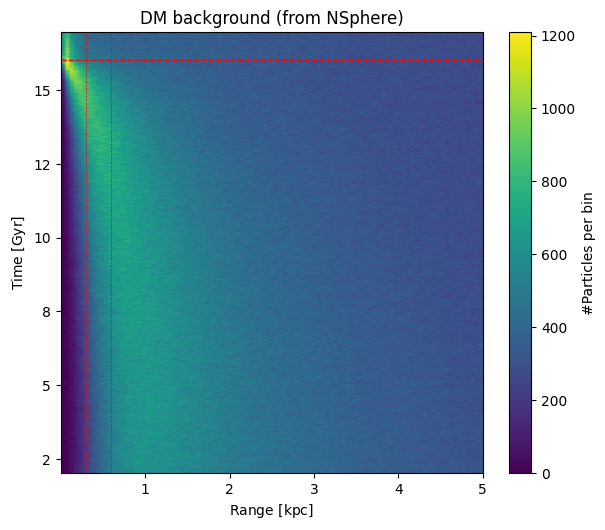

In [152]:
length_units = 'kpc'
time_units='Gyr'
xlabel = 'Range'
ylabel = 'Time'
cbar_label = '#Particles per bin'
kwargs = {}
fig,ax = plot.plot_2d(
    grid=grid,
    extent=extent,
    x_units=length_units,
    y_units=time_units,
    xlabel=utils.add_label_unit(xlabel, length_units),
    ylabel=utils.add_label_unit(ylabel, time_units),
    cbar_label=cbar_label,
    title='DM background (from NSphere)',
    **kwargs,
)
ax.axhline(y=16, color='red', linestyle='--', linewidth=1)
ax.axvline(x=0.3, color='red', linestyle='--', linewidth=0.5)
ax.axvline(x=0.6, color='red', linestyle='--', linewidth=0.5)

In [25]:
group['r']

<MaskedQuantity [1.83906748e-03, 2.56875821e-03, 3.67267662e-03, ...,
                 2.63307112e+01, 2.64852304e+01, 2.69096327e+01] kpc>

In [33]:
np.argmin(np.abs(np.unique(halo.snapshots['time'])-Quantity(1.5,'Gyr')))

np.int64(14)

In [40]:
x = halo.snapshots[halo.snapshots['time'] == np.unique(halo.snapshots['time'])[14]]
y = halo.snapshots[halo.snapshots['time'] == np.unique(halo.snapshots['time'])[164]]
data = pd.DataFrame({'initial':np.array(halo.initial_particles.to_pandas().sort_values('particle_index')['r']).astype(np.float64),
                     'max core':np.array(x.to_pandas().sort_values('particle_index')['r']).astype(np.float64),
                     'collapse':np.array(y.to_pandas().sort_values('particle_index')['r']).astype(np.float64)})

data.to_csv('baryonic all positions.csv',index=False)
times = Quantity([Quantity(0,'Myr'),x['time'][0],y['time'][0]]).to('Gyr')

In [50]:
x = nsphere_all_data[nsphere_all_data['time'] == np.unique(nsphere_all_data['time'])[38]]
y = nsphere_all_data[nsphere_all_data['time'] == np.unique(nsphere_all_data['time'])[383]]

data = pd.DataFrame({'initial':np.array(nsphere_initial_data.sort_values('particle_index')['r']),
                     'max core':np.array(x.sort_values('particle_index')['r']),
                     'collapse':np.array(y.sort_values('particle_index')['r'])})
data.to_csv('DM all positions.csv',index=False)
times = Quantity([0,x['time'].iloc[0],y['time'].iloc[0]],'Gyr')

In [51]:
import pandas as pd
import numpy as np

data = pd.read_csv('baryonic all positions.csv')
unit_mass = 1e5/1e4
bins = np.geomspace(1e-3,1e3,100)

def process(r,bins,unit_mass):
    counts, bin_edges = np.histogram(r, bins=bins)
    histogram_bins = np.array(list(zip(bin_edges, bin_edges[1:])))
    bin_centers = histogram_bins.mean(1)
    volume = 4 / 3 * np.pi * (histogram_bins[:, 1] ** 3 - histogram_bins[:, 0] ** 3)
    density = (counts / volume * unit_mass)
    return pd.DataFrame({'bin_centers':bin_centers,'volume':volume,'counts':counts,'density':density})

binned_data = pd.concat([process(data[column],bins,unit_mass).rename(columns={'counts':f'{column} counts','density':f'{column} density'})
                         for column in data],axis=1)
binned_data = binned_data.loc[:,~binned_data.columns.duplicated()].copy()
binned_data.to_csv('baryonic binned data.csv',index=False)

In [52]:
import pandas as pd
import numpy as np

data = pd.read_csv('DM all positions.csv')
unit_mass = 1.15e9/1e5
bins = np.geomspace(1e-3,1e3,100)

def process(r,bins,unit_mass):
    counts, bin_edges = np.histogram(r, bins=bins)
    histogram_bins = np.array(list(zip(bin_edges, bin_edges[1:])))
    bin_centers = histogram_bins.mean(1)
    volume = 4 / 3 * np.pi * (histogram_bins[:, 1] ** 3 - histogram_bins[:, 0] ** 3)
    density = (counts / volume * unit_mass)
    return pd.DataFrame({'bin_centers':bin_centers,'volume':volume,'counts':counts,'density':density})

binned_data = pd.concat([process(data[column],bins,unit_mass).rename(columns={'counts':f'{column} counts','density':f'{column} density'})
                         for column in data],axis=1)
binned_data = binned_data.loc[:,~binned_data.columns.duplicated()].copy()
binned_data.to_csv('DM binned data.csv',index=False)

In [34]:
initial = halo.initial_particles.to_pandas()
snapshots = halo.snapshots.to_pandas()
now = halo.particles.to_pandas()

pd.concat([initial,snapshots,now],ignore_index=True).drop(columns='step').to_csv('Baryonic particles.csv')

In [42]:
x = nsphere_all_data.drop(columns=['rank','mass','PsiA','L','T'])

In [43]:
x.to_pickle('dm particles.pkl')

Text(0.5, 1.0, 'Baryonic matter radius distribution')

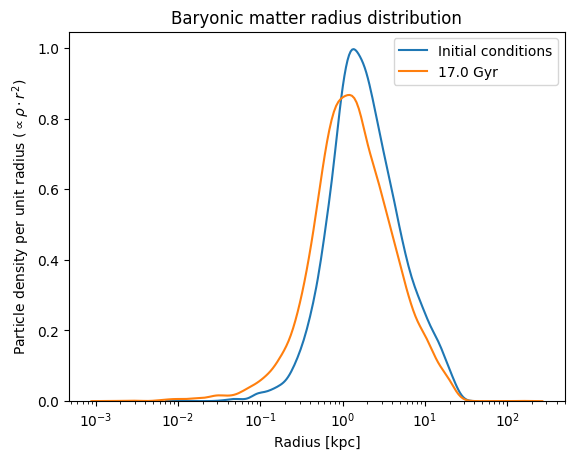

In [51]:
ax = sns.kdeplot(np.array(halo.initial_particles['r']).astype(np.float64),log_scale=True,label='Initial conditions')
sns.kdeplot(halo.particles['r'],log_scale=True,ax=ax,label=f'{halo.time.to('Gyr'):.1f}')
ax.legend()
ax.set_xlabel('Radius [kpc]')
ax.set_ylabel(r'Particle density per unit radius ($\propto \rho\cdot r^2$)')
ax.set_title('Baryonic matter radius distribution')

(0.01, 30.0)

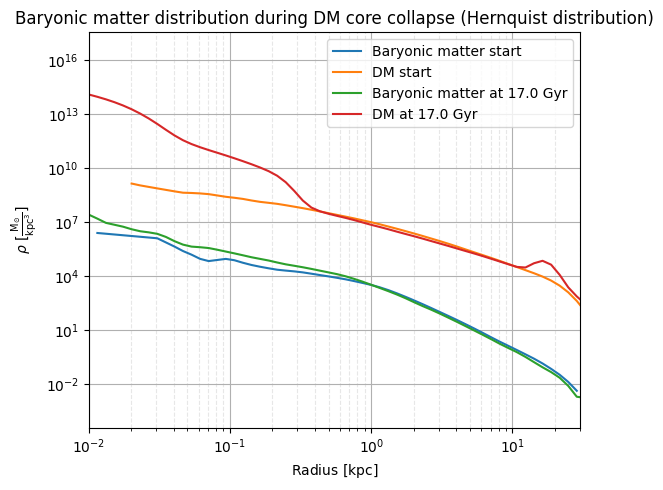

In [29]:
bins = Quantity(np.geomspace(1e-3,1e3,100),'kpc')
fig,ax = plot.plot_density(halo.initial_particles['r'],label='Baryonic matter start',unit_mass=halo.m[0],bins=bins)
fig,ax = plot.plot_density(Quantity(nsphere_initial_data['r'],'kpc'),label='DM start',unit_mass=nsphere_unit_mass,bins=bins,fig=fig,ax=ax)
fig,ax = plot.plot_density(halo.particles['r'],fig=fig,ax=ax,label=f'Baryonic matter at {halo.time.to('Gyr'):.1f}',bins=bins,unit_mass=halo.m[0])
fig,ax = plot.plot_density(Quantity(nsphere_all_data[nsphere_all_data['save_step']==869],'kpc'),label='DM at 17.0 Gyr',unit_mass=nsphere_unit_mass,
                           bins=bins,fig=fig,ax=ax,title='Baryonic matter distribution during DM core collapse (Hernquist distribution)')
ax.set_xlim([1e-2,0.3e2])

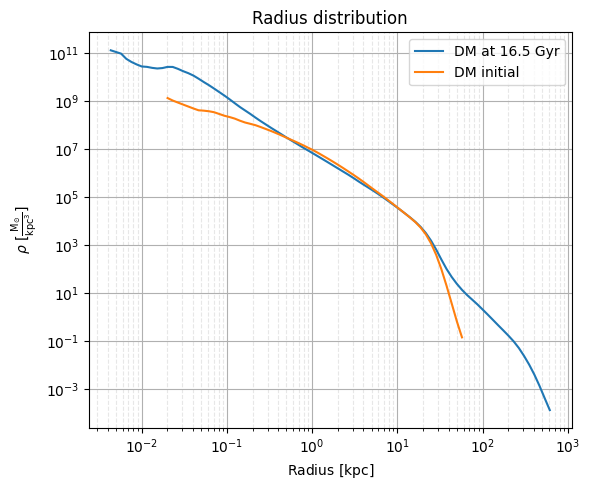

In [7]:
t = Quantity(nsphere_all_data[nsphere_all_data['save_step'] == 845]['time'].iloc[0],'Gyr')
fig,ax = plot.plot_density(Quantity(nsphere_all_data[nsphere_all_data['save_step'] == 845]['r'],'kpc'),label=f'DM at {t:.1f}',
                           unit_mass=nsphere_unit_mass,bins=Quantity(np.geomspace(1e-3,1e3,100),'kpc'))
fig,ax = plot.plot_density(Quantity(nsphere_initial_data['r'],'kpc'),label='DM initial',unit_mass=nsphere_unit_mass,
                           bins=Quantity(np.geomspace(1e-3,1e3,100),'kpc'),fig=fig,ax=ax)

In [8]:
data = nsphere.to_saved_state_like(nsphere.load_all_files(base_filename='Rank_Mass_Rad_VRad_unsorted',ntimesteps=12525000,tfinal=1100,
                                                          max_time=19.605*Gyr,root_path='../../NSphere-SIDM/data'))

Load files: 100%|███████████████████████████████████████████████████████| 501/501 [00:01<00:00, 346.59it/s]


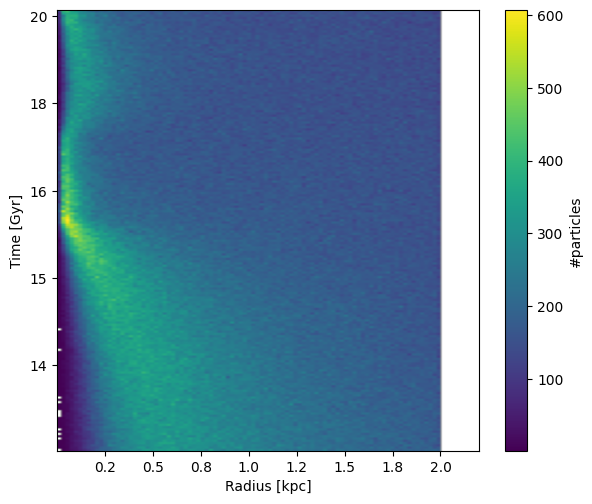

In [17]:
data['output'] = (data.v_norm/(km/second))**2
time_units={'name':'Gyr','value':Gyr}
length_units={'name':'kpc','value':kpc}
grid,extent = halo.prep_2d_data(data,radius_range=(0,2*kpc),time_range=(12*Gyr,20*Gyr),x_units=length_units,time_units=time_units,agg_fn='count')

utils.plot_2d(grid,extent=extent,x_units=length_units,y_units=time_units,xlabel='Radius [{name}]',ylabel='Time [{name}]',cbar_label='#particles',
              x_nbins=10,x_tick_format='%.1f');

/home/rotembarnea/Documents/SIDM/pySIDM/src/halo.py:293: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  agg_data = pd.concat([agg_data,pad]).drop_duplicates(['time','bin']).sort_values(['time','bin'])


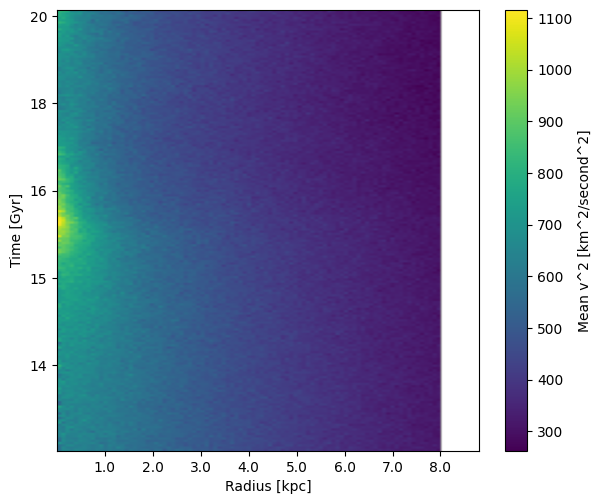

In [26]:
data['output'] = (data.v_norm/(km/second))**2
time_units={'name':'Gyr','value':Gyr}
length_units={'name':'kpc','value':kpc}
grid,extent = halo.prep_2d_data(data,radius_range=(0,8*kpc),x_units=length_units,time_units=time_units,agg_fn='mean')

utils.plot_2d(grid,extent=extent,x_units=length_units,y_units=time_units,xlabel='Radius [{name}]',ylabel='Time [{name}]',
              cbar_label='Mean v^2 [km^2/second^2]');

In [68]:
data = nsphere.load_all_files(base_filename='Rank_Mass_Rad_VRad_unsorted',ntimesteps=12525000,tfinal=1100,
                              max_time=19.605*Gyr,root_path='../../NSphere-SIDM/data')
data['v^2'] = data['Vrad']**2+(data['L']/data['R'])**2
data['time'] /= Gyr

Load files: 100%|███████████████████████████████████████████████████████| 501/501 [00:02<00:00, 212.54it/s]


In [72]:
data['Etot'] = data['E'] + data['PsiA']

In [ ]:
agg_data_E = data.groupby('time').E.agg('sum')
agg_data_Etot = data.groupby('time').E_tot.agg('sum')
agg_data_v2 = data.groupby('time')['v^2'].agg('sum')

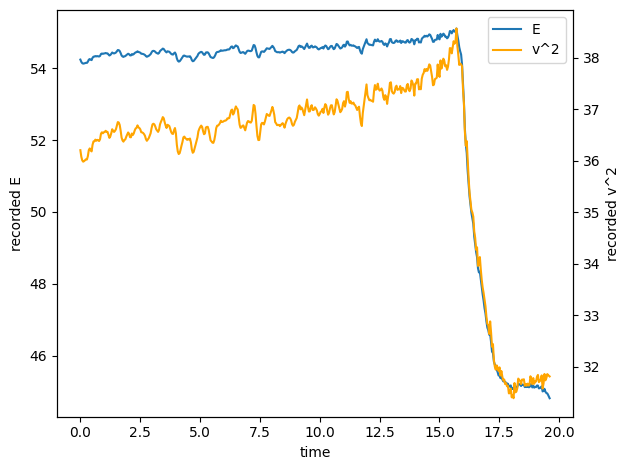

In [70]:
fig,ax1 = plt.subplots()
ax = sns.lineplot(agg_data_E,label='E')
ax1.set_ylabel('recorded E')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
sns.lineplot(data=agg_data_v2,ax=ax2,color='orange',label='v^2')
ax2.set_ylabel('recorded v^2')
ax2.tick_params(axis='y')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.get_legend().remove()
ax2.get_legend().remove()
ax1.legend(lines1 + lines2, ['E', 'v^2'], loc='upper right')

# Add title and show
plt.tight_layout()

# Numerical test

In [4]:
rs = []
for n in tqdm(np.geomspace(10**4,10**7)):
    sub = pd.DataFrame({'r':np.sort(dm_distribution.roll_r(n))})
    sub[['vx','vy','vr']] = dm_distribution.roll_v_3d(Quantity(sub['r'],'kpc'))
    sub['n'] = n
    sub['P'] = physics.sidm.scatter_chance_shortcut(sub['r'],sub['vx'],sub['vy'],sub['vr'],dt=dm_distribution.Tdyn / 1000,m=np.full(int(n),dm_Mtot/n),
                                                    sigma=sigma.to(run_units.cross_section),max_radius_j=10)
    sub['T'] = 1/2*(sub['vx']**2+sub['vy']**2+sub['vr']**2)/n
    rs += [sub]
rs = pd.concat(rs,ignore_index=True)

  0%|          | 0/50 [00:00<?, ?it/s]

In [5]:
regions = {'inner core < 0.2 kpc':Quantity([0,0.2],'kpc'),'[0.2,1) kpc':Quantity([0.2,1],'kpc'),
           '[1,5) kpc':Quantity([1,5],'kpc'),'[5,20) kpc':Quantity([5,20],'kpc')}

In [6]:
data = [[(n,name,group.loc[group['r'].between(*bounds),'r'].diff(1).mean(),group['r'].between(*bounds).sum(),
          group.loc[group['r'].between(*bounds),'P'].mean()) for name,bounds in regions.items()]
        for n,group in tqdm(rs.groupby('n'))]
data = pd.DataFrame(np.vstack(data),columns=['n','name','mean dr','count','mean P'])
data['mean dr'] = data['mean dr'].astype(float)
data['n'] = data['n'].astype(float)
data['count'] = data['count'].astype(int)
data['mean P'] = data['mean P'].astype(float)
for label,group in data.groupby('name'):
    data.loc[group.index,'norm mean dr'] = group['mean dr']/np.diff(regions[label])[0].value

  0%|          | 0/50 [00:00<?, ?it/s]

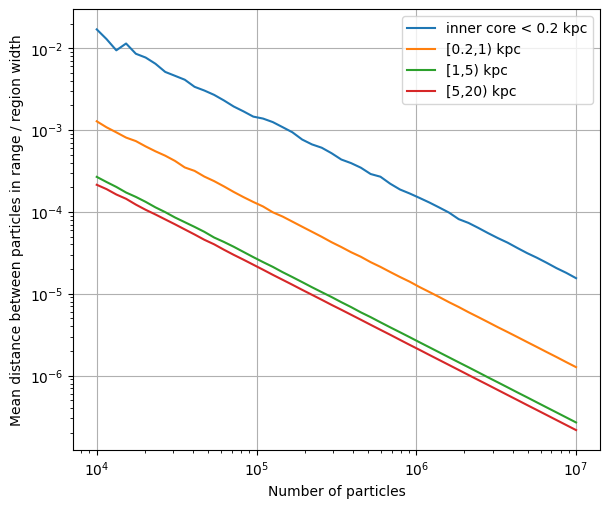

In [145]:
fig,ax = plot.setup_plot(xlabel='Number of particles',ylabel='Mean distance between particles in range / region width',ax_set={'xscale':'log','yscale':'log'})
for name,group in data.groupby('name',sort=False):
    sns.lineplot(group,x='n',y='norm mean dr',ax=ax,label=name)

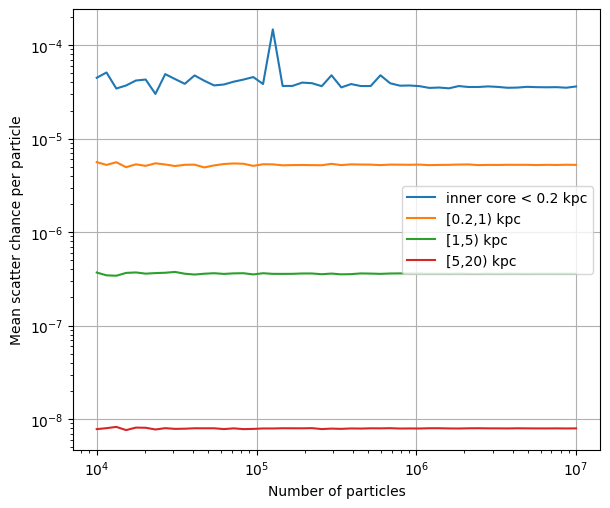

In [147]:
fig,ax = plot.setup_plot(xlabel='Number of particles',ylabel='Mean scatter chance per particle',ax_set={'xscale':'log','yscale':'log'})
for name,group in data.groupby('name',sort=False):
    sns.lineplot(group,x='n',y='mean P',ax=ax,label=name)

In [7]:
rs.groupby('n')['T'].agg('sum')

n
1.000000e+04    0.000179
1.151395e+04    0.000178
1.325711e+04    0.000176
1.526418e+04    0.000175
1.757511e+04    0.000181
2.023590e+04    0.000177
2.329952e+04    0.000177
2.682696e+04    0.000180
3.088844e+04    0.000178
3.556480e+04    0.000178
4.094915e+04    0.000178
4.714866e+04    0.000180
5.428675e+04    0.000178
6.250552e+04    0.000177
7.196857e+04    0.000178
8.286428e+04    0.000179
9.540955e+04    0.000178
1.098541e+05    0.000179
1.264855e+05    0.000178
1.456348e+05    0.000178
1.676833e+05    0.000178
1.930698e+05    0.000178
2.222996e+05    0.000178
2.559548e+05    0.000178
2.947052e+05    0.000179
3.393222e+05    0.000178
3.906940e+05    0.000178
4.498433e+05    0.000178
5.179475e+05    0.000178
5.963623e+05    0.000179
6.866488e+05    0.000178
7.906043e+05    0.000179
9.102982e+05    0.000178
1.048113e+06    0.000178
1.206793e+06    0.000178
1.389495e+06    0.000178
1.599859e+06    0.000178
1.842070e+06    0.000178
2.120951e+06    0.000178
2.442053e+06    0.00017

# Initial distributions:

In [13]:
# halo.plot_distributions_rho();

In [ ]:
fig,ax = halo.plot_distribution('v_norm',halo.initial_particles,figsize=(10,6),filter_particle_type='baryon')
fig,ax = halo.plot_distribution('v_norm',halo.initial_particles,figsize=(10,6),filter_particle_type='dm')
fig,ax = halo.plot_r_distribution(halo.initial_particles,figsize=(10,6),filter_particle_type='baryon',add_density=1)
fig,ax = halo.plot_r_distribution(halo.initial_particles,figsize=(10,6),filter_particle_type='dm',add_density=0)

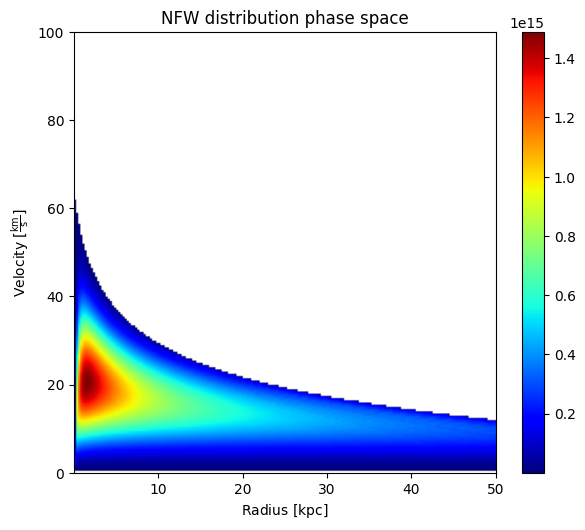

In [78]:
halo.distributions[0].plot_phase_space(title='NFW distribution phase space');

In [92]:
rs = halo.distributions[0].roll_r(1e4)
vs = halo.distributions[0].roll_v_3d(rs).to('km/second')
vs = np.linalg.norm(vs,axis=1)

<Axes: ylabel='Count'>

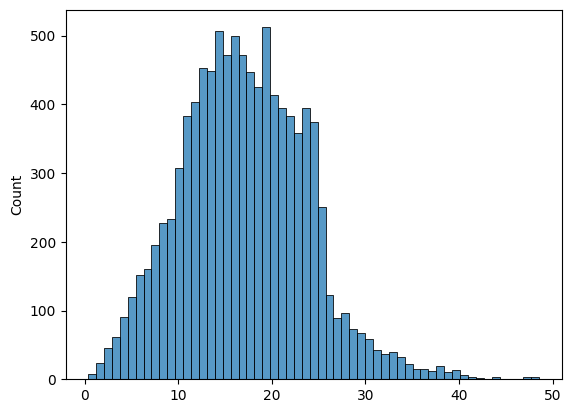

In [93]:
sns.histplot(vs)

In [44]:
sub['v_norm'] = sub['v_norm'].to('km/second')

In [46]:
sub['v_norm'].mean()

<Quantity 17.16996662 km / s>

In [52]:
grid

<Quantity [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]]>

In [72]:
len(data),mask.shape

(100000, (110000,))

(<Figure size 600x500 with 2 Axes>,
 <Axes: xlabel='Radius [$\\mathrm{kpc}$]', ylabel='Velocity [$\\mathrm{\\frac{km}{s}}$]'>)

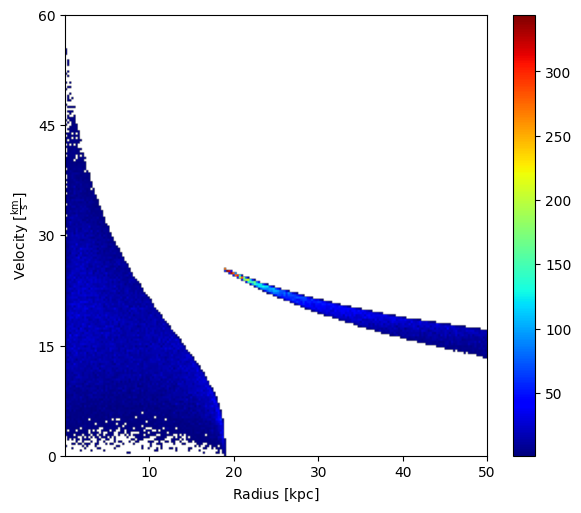

In [76]:
radius_bins=Quantity(np.linspace(1e-2, 50, 200), 'kpc')
velocity_bins=Quantity(np.linspace(0, 60, 200), 'km/second')

data = halo.initial_particles[halo.initial_particles['particle_type'] == 'dm'].copy()

# data = data[(data['v_norm'] < Quantity(15,'km/second'))*(data['r'] > Quantity(20,'kpc'))]

grid, extent = plot.aggregate_phase_space_data(data=data, radius_bins=radius_bins, velocity_bins=velocity_bins)


sub = data[['r','v_norm']]

plot.plot_2d(
    grid=Quantity(np.histogram2d(sub['r'], sub['v_norm'], (radius_bins, velocity_bins))[0].T,''),
    extent=extent,
    xlabel='Radius',
    ylabel='Velocity',
    x_units='kpc',
    y_units='km/second',
    cmap='jet',
    transparent_value=0,
)

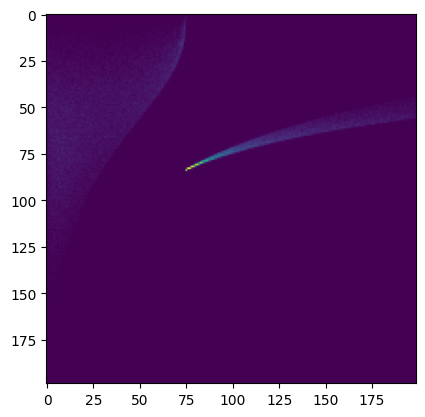

In [37]:
plt.imshow(grid)

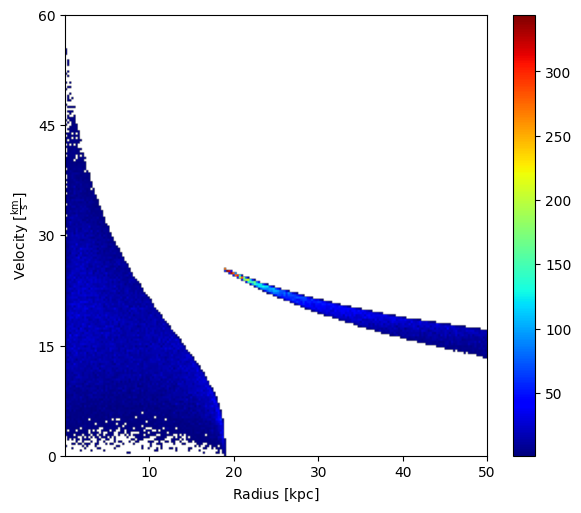

In [23]:
halo.plot_phase_space(halo.initial_particles,filter_particle_type='dm',radius_bins = Quantity(np.linspace(1e-2, 50, 200), 'kpc'),
        velocity_bins = Quantity(np.linspace(0, 60, 200), 'km/second'));

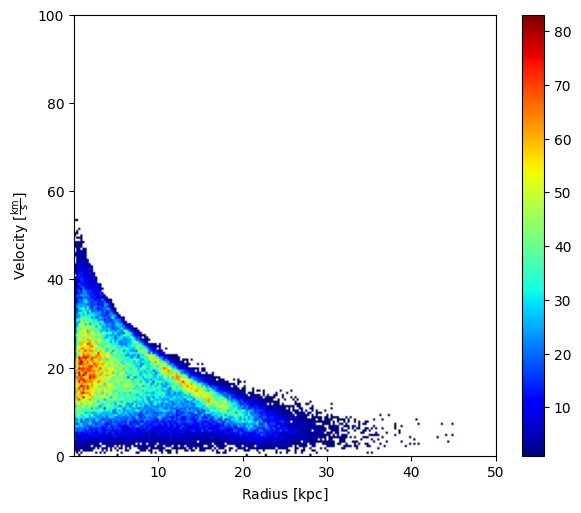

In [7]:
from matplotlib import colors
halo.plot_phase_space_evolution(save_path='../../phase space NFW.gif',frame_plot_kwargs={'norm':colors.Normalize(0,100)});

## Compare with NSphere:

In [9]:
nsphere_all_data = nsphere.load_all_files(base_filename='Rank_Mass_Rad_VRad_unsorted',ntimesteps=12525000,tfinal=1100,max_time=Quantity(19.605,'Gyr'),
                                          root_path='../../NSphere-SIDM/data/NO SIDM run')
nsphere_all_data['vp'] = nsphere_all_data['L']/nsphere_all_data['R']
nsphere_all_data['v_norm'] = np.sqrt(nsphere_all_data['vp']**2+nsphere_all_data['Vrad']**2)
nsphere_all_data['T'] = 1/2*nsphere_all_data['v_norm']**2
nsphere_all_data['particle_index'] = np.hstack([np.arange(100000)]*501)
nsphere_all_data = nsphere_all_data.rename(columns={'R':'r','Vrad':'vr'})
nsphere_initial_data = nsphere_all_data[nsphere_all_data['time'] == nsphere_all_data['time'].min()].copy().sort_values('R')

Load files: 100%|███████████████████████████████████████████████████████| 501/501 [00:02<00:00, 236.68it/s]


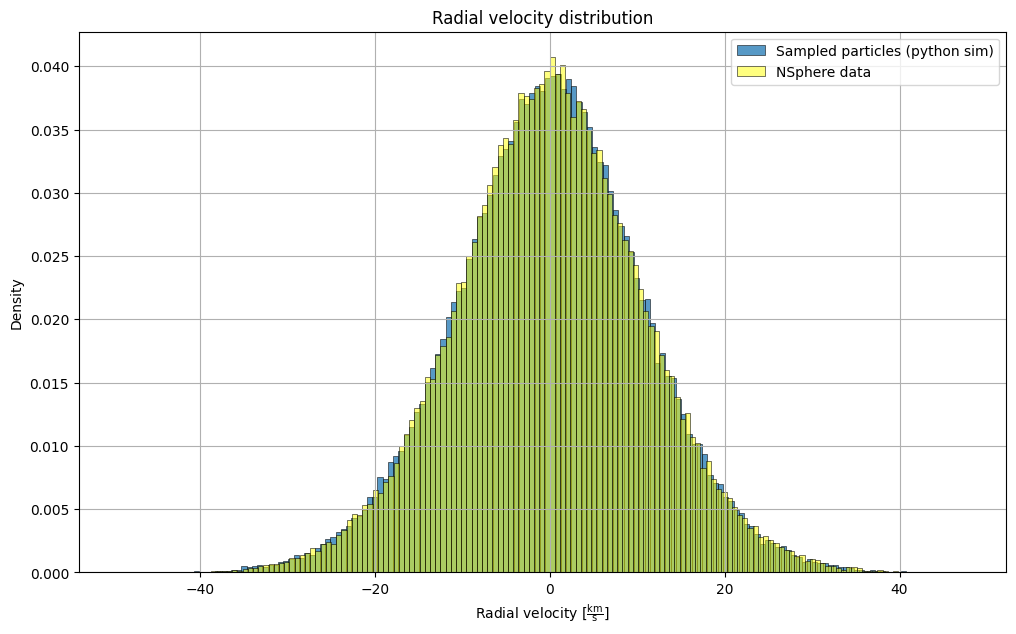

In [13]:
data = Quantity(nsphere_initial_data['vr'],'kpc/Myr').to('km/second')
fig,ax = halo.plot_distribution('vr',halo.initial_particles,figsize=(10,6),label='Sampled particles (python sim)')
sns.histplot(data,ax=ax,color='yellow',label='NSphere data',stat='density',alpha=0.5)

ax.legend()